<a href="https://colab.research.google.com/github/josefinasolisb/Bank_data/blob/main/Classification_Metrics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/M2_MachineLearning/W3_Classification_Models/Ex_3/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
X = df.drop(columns = 'y_yes')
y = df['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [ ]:
def evaluate_model(model_pipe, X_train, y_train, X_test, y_test):
  # Get predictions
  y_pred_train = model_pipe.predict(X_train)
  y_pred_test = model_pipe.predict(X_test)

  # Accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train).round(2)
  test_accuracy = accuracy_score(y_test, y_pred_test).round(2)

  print('Train Accuracy:', train_accuracy)
  print('Test Accuracy:', test_accuracy)
  print()

  # Sensitivity
  train_recall = recall_score(y_train, y_pred_train).round(2)
  test_recall = recall_score(y_test, y_pred_test).round(2)

  print('Train Sensitivity:', train_recall)
  print('Test Sensitivity:', test_recall)
  print()

  # Specificity
  train_conf_matrix = confusion_matrix(y_train, y_pred_train)
  tn_train, fp_train, fn_train, tp_train = train_conf_matrix.ravel()
  specificity_train = tn_train / (tn_train + fp_train)

  test_conf_matrix = confusion_matrix(y_test, y_pred_test)
  tn_test, fp_test, fn_test, tp_test = test_conf_matrix.ravel()
  specificity_test = tn_test / (tn_test + fp_test)

  print("Train Specificity:", round(specificity_train, 2))
  print("Test Specificity:", round(specificity_test, 2))
  print()



  # AUC
  y_pred_proba_train = model_pipe.predict_proba(X_train)
  y_pred_proba_test = model_pipe.predict_proba(X_test)
  train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:,1]).round(2)
  test_roc_auc = roc_auc_score(y_test, y_pred_proba_test[:,1]).round(2)

  print('Train AUC-ROC:', train_roc_auc)
  print('Test AUC-ROC:', test_roc_auc)
  print()

  # Visualize the ROC curve
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[0])
  axes[0].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[0].legend();
  axes[0].set_title("Training Data")

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title("Test Data")

  fig.suptitle('ROC Curves')
  fig.tight_layout()
  plt.show()

Train Accuracy: 0.89
Test Accuracy: 0.88

Train Sensitivity: 0.22
Test Sensitivity: 0.15

Train Specificity: 0.98
Test Specificity: 0.98

Train AUC-ROC: 0.86
Test AUC-ROC: 0.84



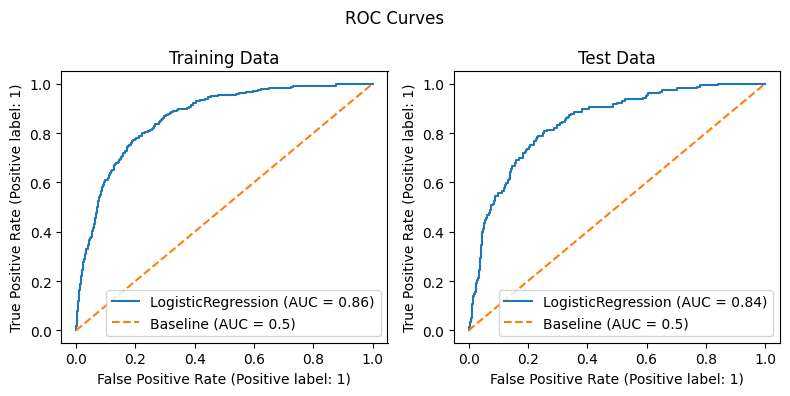

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear')
# source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg.fit(X_train_tf, y_train)
evaluate_model(log_reg, X_train_tf, y_train, X_test_tf, y_test)

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 0.1],
          'class_weight': [None, 'balanced']}

gs = GridSearchCV(log_reg, params, cv = 5)
gs.fit(X_train_tf, y_train)

gs.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

Train Accuracy: 0.89
Test Accuracy: 0.89

Train Sensitivity: 0.2
Test Sensitivity: 0.15

Train Specificity: 0.98
Test Specificity: 0.98

Train AUC-ROC: 0.87
Test AUC-ROC: 0.85



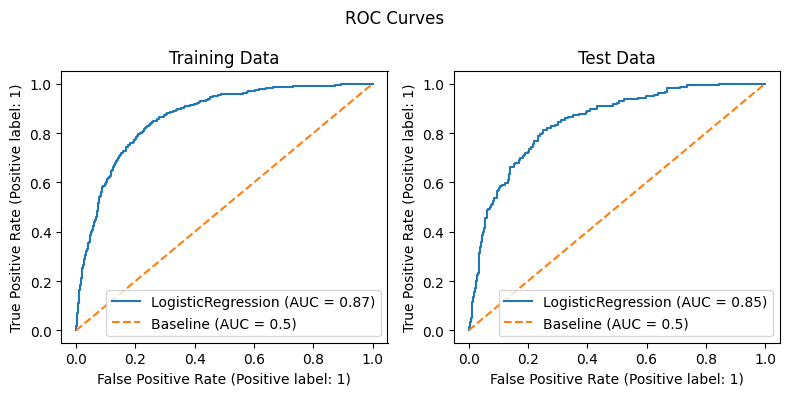

In [ ]:
log_reg_best = LogisticRegression(solver = 'liblinear', C=0.1, penalty='l1', class_weight=None)
log_reg_best.fit(X_train_tf, y_train)
evaluate_model(log_reg_best, X_train_tf, y_train, X_test_tf, y_test)

1. ¿Qué métrica va a ser la mejor para evaluar el modelo de clasificación para este conjunto de datos y por qué? Pista: piensen en lo que cada métrica significa en este caso específico. ¿Cuál métrica ayudará más al banco?

 La metrica mas recomendable para analizar el rendimiento general de cualquier modelo es AUC-ROC ya que tiene incorporada Sensitivity y Specificity. Sin embargo, el banco estaría más interesado en identificar correctamente a los clientes que se suscribirán a un depósito a plazo (verdaderos positivos), incluso si eso significa que algunas personas que no se suscribian puedan ser clasificadas incorrectamente (falsos positivos). Por lo que esta metrica especifica puede ayudar a mejorar las operaciones del banco orientadas capatar a los clientes objetivo.

2. Comparen la exactitud del modelo con el modelo de referencia. ¿Ven algún problema?

Train Accuracy: 0.88
Test Accuracy: 0.89

Train Sensitivity: 0.0
Test Sensitivity: 0.0

Train Specificity: 1.0
Test Specificity: 1.0

Train AUC-ROC: 0.5
Test AUC-ROC: 0.5



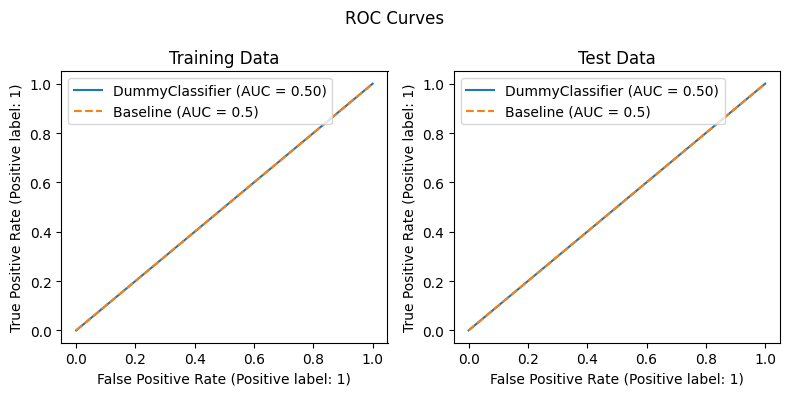

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_tf, y_train)
evaluate_model(dummy, X_train_tf, y_train, X_test_tf, y_test)



###Regresion logistica optimizado

* Train Accuracy: 0.89
* Test Accuracy: 0.89

###Dummy Classifier (Modelo de referencia)

* Train Accuracy: 0.88
* Test Accuracy: 0.89

Comparando el Accuracy del modelo con el modelo de referencia, se puede ver que el score de train para la regresión logística no es mejor que la del Dummy Classifier por 0.01. A pesar de que es un valor muy pequeño, esto indica que el modelo de regresión logística no está captando patrones significativos de los datos. El modelo deberia ser mejor que el modelo de referencia para asegurar que se tiene un buen modelo de clasificacion.

3. ¿De qué otras formas se puede mejorar este modelo?
* Cambiar el random state del train test split
* Utilizar otros valores y parametros en el grid search para ajustar hiperparametros
* Ajustar los hiperparametros utilizando random search
* Utilizar otro modelos de clasificacion
